In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import optimizers
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float64')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float64')

In [119]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))

In [120]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 64)          18496     
Total params: 37,600
Trainable params: 37,600
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.add(layers.Flatten())
model.add(layers.Dense(400, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [122]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2096 - accuracy: 0.9590 - val_loss: 0.0529 - val_accuracy: 0.9841
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0570 - accuracy: 0.9826 - val_loss: 0.0398 - val_accuracy: 0.9865
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0449 - val_accuracy: 0.9855
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0550 - val_accuracy: 0.9827
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0548 - val_accuracy: 0.9839
Epoch 7/10
60000/60000 [==========================

In [124]:
pred=model.predict(x_test)

In [125]:
y_pred=[]
for p in pred:
    y_pred.append(np.argmax(p))

In [126]:
misclass=np.zeros(10)
misx=[]
misy=[]
misPred=[]
for i in range(len(x_test)):
    if y_test[i]!=y_pred[i]:
        misx.append(x_test[i])
        misy.append(y_test[i])
        misPred.append(y_pred[i])
        misclass[y_test[i]]+=1

<BarContainer object of 10 artists>

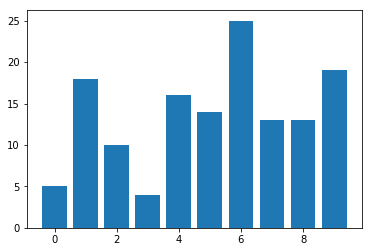

In [127]:
plt.bar(range(10),misclass)

TypeError: Invalid dimensions for image data

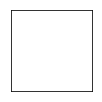

In [129]:
plt.figure(figsize=(20,50))
for i in range(len(misx)):
    plt.subplot(len(misx)//5+1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(misx[i],(28,28)), cmap=plt.cm.binary)
    plt.xlabel(str(misy[i])+' misclassified as '+str(misPred[i]))
plt.savefig('missclassified.png')
plt.show()